# Welcome

This is the haiopy demo and a good place for getting started. In this notebook, you will see examples of the most important haiopy functionalty.

**Note:** This is not a substitute for the haiopy documentaion at **insert_url**.

## Contents
[Signals](#signals)

[Coordinates](#coordinates)
- [Entering coordinate points](#coordinates_enter)
- [Retrieving coordinate points](#coordinates_retrieve)
- [Rotating coordinate points](#coordinates_rotate)


Lets start with importing haiopy and numpy:

In [1]:
# import packages
import haiopy
import haiopy.spatial.samplings as samplings
import numpy as np

# Signals<a class="anchor" id="signals"></a>

Audio signals are the basis of haiopy. They are stored in objects of the `Signal` class along with information about the sampling rate, the domain (`time`, or `freq`), the FFT type and an optional comment. Lets go ahead and create a single channel signal:

In [2]:
# create a signal
x = haiopy.Signal(np.sin(np.linspace(0, 40 * np.pi, 1000)),  # this is the signal
                  44100)                                     # this is the sampling rate in Hz

# show information
x

Audio Signal
--------------------
(1,) channels with 1000 samples @ 44100 Hz sampling rate

# ... the demo will be continued, when all the essentials are merged into develop

# Coordinates<a class="anchor" id="coordinates"></a>

The `Coordinates()` is designed for storing, manipulating, and acessing coordinate points. Lets create and empty `Coordinates` and look at the implemented coordinate conventions first:

In [3]:
c = haiopy.Coordinates()
c.systems()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
domain: cart, convention: right, unit: [met]

Right handed cartesian coordinate system.

Coordinates:
1: x [meters]
2: y [meters]
3: z [meters]

Right handed cartesian coordinate system with x,y, and z in meters.


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
domain: sph, convention: top_colat, unit: [rad, deg]

Spherical coordinate system with North and South Pole.

Coordinates:
1: azimuth [radians, degrees]
2: colatitude [radians, degrees]
3: radius [meters, meters]

The azimuth denotes the counter clockwise angle in the x/y-plane with 0 pointing in positive x-direction and pi/2 in positive y-direction. The colatitude denotes the angle downwards from the z-axis with 0 pointing in positve z-direction and pi in negative z-direction. The azimuth and colatitude can be in radians or degrees, the radius is always in meters.


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
domain:

## Entering coordinate points<a class="anchor" id="coordinates_enter"></a>

Coordinate points can be entered manually or by using one of the available sampling schemes contained in `haiopy.spatial.samplings`. We will do the latter using an equal angle sampling and look at the information provided by the coordinates object:

1D Coordinates object with 308 points of cshape (308,)
domain: sph, convention: top_colat, unit: deg
coordinates: azimuth in degrees, colatitude in degrees, radius in meters
Does not contain sampling weights
Comment: equal angle spherical sampling grid


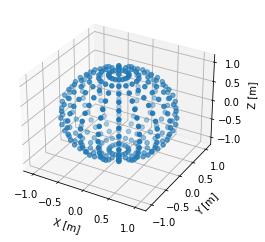

In [4]:
c = samplings.sph_equal_angle((20, 10))
# show general information
print(c)
# plot the sampling points
c.show()

Inside the `Coordinates` object, the points are stored in an N-dimensional array of size `[..., 3]` where the last dimension in this case holds the azimuth, colatitude, and radius. Information about coordinate array can be obtained by `c.cshape`, `c.csize`, and `c.cdim`. These properties are similar to numpy's `shape`, `size`, and `dim` but ignore the last dimension, which is always 3.

## Retrieving coordinate points<a class="anchor" id="coordinates_retrieve"></a>

There are different ways to retrieve points from a `Coordinates` object. All points can be obtained in cartesian, spherical, and cylindrical coordinates using the getter functions `c.get_cart()`, `c.get_sph()` and `c.get_cyl()`, e.g.:

In [5]:
cartesian_coordinates = c.get_cart()

Different methods are available for obtaining a specific subset of coordinates. For example the nearest point(s) can be obtained by

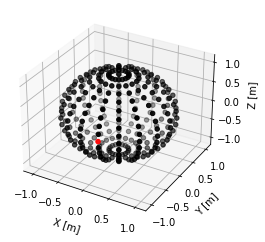

In [6]:
c_out = c.get_nearest_k(
    270, 90, 1, k=1, domain='sph', convention='top_colat', unit='deg', show=True)

To obtain all points within a specified eucledian distance or arc distance, you can use `c.get_nearest_cart()` and `c.get_nearest_sph()`. To obtain more complicated subsets of any coordinate, e.g., the horizontal plane with `colatitude=90` degree, you can use slicing

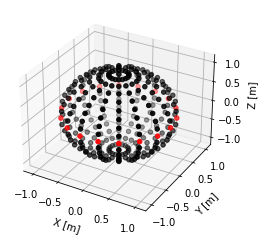

In [7]:
mask_hor = c.get_slice('colatitude', 'deg', 90, show=True)

## Rotating coordinates<a class="anchor" id="coordinates_rotate"></a>

You can apply rotations using quaternions, rotation vectors/matrixes and euler angles with  `c.rotate()`. For example rotating around the y-axis by 45 degrees can be done with

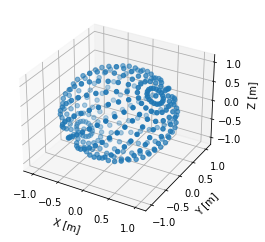

In [8]:
c.rotate('y', 45)
c.show()

Note that this changes the points inside the `Coordinates` object, which means that you have to be carefull not to apply the rotation multiple times, i.e., when evaluationg cells during debugging.